Filename : clustering.ipynb <br>
Date Created: 25/08/24 <br>
Author: Arjun P <br>

In [90]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir_path = os.path.join(parent_dir, "data")
file_path = os.path.join(data_dir_path,"d1.jpg")

file_path

# Load the image
image = Image.open(file_path).convert('L')  # Convert to grayscale
image_data = np.asarray(image)

In [11]:
image_data.shape

(5304, 7952)

## Kmeans

In [29]:
km = KMeans(n_clusters=10)
km.fit(image_data)

/home/arjunrao/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [30]:
cluster_centers = km.cluster_centers_
cluster_centers

array([[ 25.30588235,  24.90392157,  24.55686275, ...,  12.21764706,
         12.26078431,  12.25098039],
       [166.75738916, 166.80172414, 166.81280788, ..., 113.08743842,
        109.36083744, 104.53325123],
       [ 76.4245283 ,  76.50471698,  76.58018868, ...,  24.77358491,
         27.33018868,  30.75      ],
       ...,
       [ 54.69615385,  57.06153846,  59.02307692, ...,  23.02692308,
         22.22692308,  22.63461538],
       [ 20.93534483,  21.6875    ,  22.82974138, ...,  10.64655172,
         10.52586207,  10.30818966],
       [ 93.96901408,  94.62535211,  95.17746479, ...,  33.22535211,
         34.16901408,  34.23098592]])

In [31]:
km.cluster_centers_.shape

(10, 7952)

In [42]:
cluster_centers[[2,2,2,2,2]]

array([[76.4245283 , 76.50471698, 76.58018868, ..., 24.77358491,
        27.33018868, 30.75      ],
       [76.4245283 , 76.50471698, 76.58018868, ..., 24.77358491,
        27.33018868, 30.75      ],
       [76.4245283 , 76.50471698, 76.58018868, ..., 24.77358491,
        27.33018868, 30.75      ],
       [76.4245283 , 76.50471698, 76.58018868, ..., 24.77358491,
        27.33018868, 30.75      ],
       [76.4245283 , 76.50471698, 76.58018868, ..., 24.77358491,
        27.33018868, 30.75      ]])

In [32]:
segmented_image = cluster_centers[km.labels_]
segmented_image.shape

(5304, 7952)

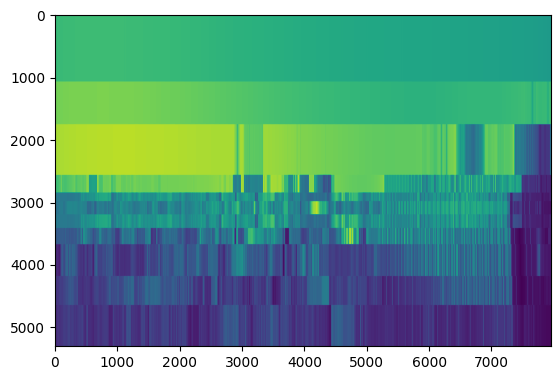

In [33]:
plt.imshow(segmented_image)

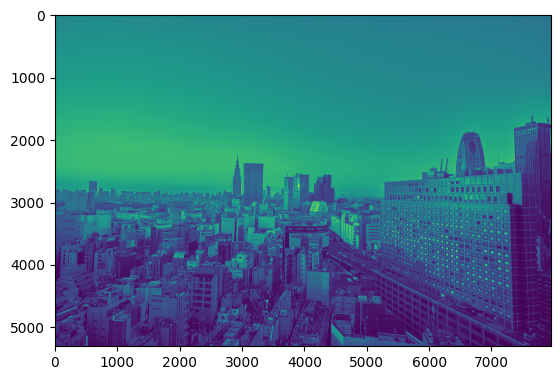

In [28]:
plt.imshow(image_data)

## DBSCAN

In [81]:
dbscan = DBSCAN(eps=0.2, min_samples=2)
clusters = dbscan.fit(image_data)

In [87]:
clusters.core_sample_indices_

array([], dtype=int64)

In [74]:
image_data.shape

(5304, 7952)

In [75]:
image = Image.open(file_path) # Convert to grayscale
image_data = np.asarray(image)

In [76]:
image_data.shape

(5304, 7952, 3)

In [77]:
flat_data = image_data.reshape(-1,3)

In [78]:
flat_data.shape

(42177408, 3)

In [89]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_

array([ 0,  0,  0,  1,  1, -1])

## Hdbscan

In [92]:
dbscan = HDBSCAN(min_cluster_size=5,min_samples=2)
clusters = dbscan.fit(image_data)

In [109]:
clusters.labels_

array([218, 218, 218, ...,  31,  31,  31])

In [104]:
clusters.probabilities_

array([0.94382605, 1.        , 1.        , ..., 1.        , 1.        ,
       1.        ])

In [105]:
vars(clusters)

{'min_cluster_size': 5,
 'min_samples': 2,
 'alpha': 1.0,
 'max_cluster_size': None,
 'cluster_selection_epsilon': 0.0,
 'metric': 'euclidean',
 'metric_params': None,
 'algorithm': 'auto',
 'leaf_size': 40,
 'n_jobs': None,
 'cluster_selection_method': 'eom',
 'allow_single_cluster': False,
 'store_centers': None,
 'copy': False,
 '_metric_params': {},
 'n_features_in_': 7952,
 '_raw_data': array([[118., 117., 116., ...,  97.,  97.,  97.],
        [118., 117., 116., ...,  97.,  97.,  97.],
        [117., 116., 115., ...,  97.,  97.,  97.],
        ...,
        [  1.,   2.,   3., ...,   4.,   4.,   4.],
        [  1.,   2.,   3., ...,   4.,   4.,   4.],
        [  2.,   1.,   0., ...,   4.,   4.,   4.]]),
 '_min_samples': 2,
 '_single_linkage_tree_': array([( 1507,  1508,   42.16633728,    2),
        ( 1587,  1588,   42.56759331,    2),
        ( 1563,  1564,   43.25505751,    2), ...,
        (10568, 10597, 1742.4207299 , 1926),
        (10602, 10604, 1743.45490335, 1928),
        (1

In [107]:
dir(clusters)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_metric_params',
 '_min_samples',
 '_more_tags',
 '_parameter_constraints',
 '_raw_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_single_linkage_tree_',
 '_validate_data',
 '_validate_params',
 '_weighted_cluster_center',
 'algorithm',
 'allow_single_cluster',
 'alpha',
 'cluster_selection_epsilon',
 'cluster_selection_method',
 'copy',
 'dbscan_clustering',
 '

In [145]:
cluster_to_highlight = -1  # Example cluster label

# Step 2: Create a mask for the selected cluster
mask = (clusters.labels_ == cluster_to_highlight)

mask

array([False, False, False, ..., False, False, False])

In [146]:
clusters.labels_.min()

-1

In [147]:
image_data[mask].shape

(221, 7952)

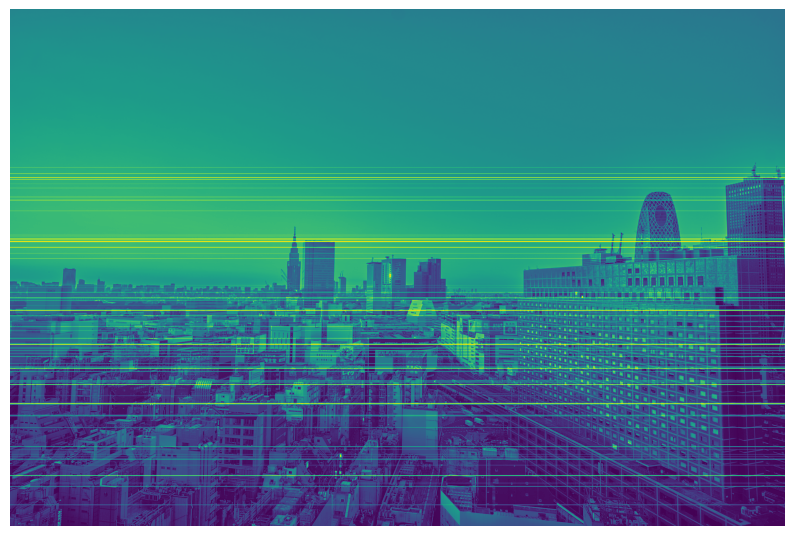

In [148]:
shaded_image = np.copy(image_data)

# Step 5: Apply shading to the masked pixels
# Example: Set masked pixels to red (R=255, G=0, B=0)
shaded_image[mask] = 255  # Shade with red color

# Step 6: Visualize the entire image with the shaded mask
plt.figure(figsize=(10, 10))
plt.imshow(shaded_image)
plt.axis('off')  # Turn off axis for better visualization
plt.show()

In [136]:
import pandas as pd

pd.Series(clusters.labels_).value_counts()

 18     238
-1      221
 31     216
 163    208
 103     88
       ... 
 73       5
 82       5
 22       5
 215      5
 12       5
Length: 419, dtype: int64